## Problem Explaniation

**Input Data:** There are two files in this folder, training_set and test_set.

- Training Set: Contains almost one year of historical electricity price data presented through multiple features from column B:L. The target column contains electricity prices per hour.
- Test Set: Contains all features for four days and the target value is not given.


The goal is designing two AI models, **one deep model** and **one ensemble model**, based on training data and predicting target values during the test set.
Feel free to:
1. Create new features and add it to the data set or remove existing ones from the data set.
2. Create the internal model architecture, parameters and fine-tuning process.


What you need to deliver:
1. In a word document, describe in your own words and in detail the data exploration and feature engineering steps and methods that you used.
2. In the same word document, describe in your own words and in detail the model selection, design, and fine-tuning process that you used.
3. Verify your data and submit an excel containing the forecasted values for the test data sets.
4. Submit one or more, .py/.m file(s), for each step.

In [1]:
# import libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [2]:
train_df = pd.read_excel('Training Set.xlsx')
test_df = pd.read_excel("Test Set.xlsx")

## Exploratory Data Analysis and Feature Engineering

In [3]:
train_df.head(3)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89


In [4]:
print("Number of Rows: ", train_df.shape[0])
print("Number of Columns: ", train_df.shape[1])

Number of Rows:  7584
Number of Columns:  13


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 7584 non-null   datetime64[ns]
 1   Hour                 7584 non-null   int64         
 2   Weekday              7584 non-null   int64         
 3   Is Working Day       7584 non-null   int64         
 4   Previous Hour Price  7584 non-null   float64       
 5   SDSH DAP             7584 non-null   float64       
 6   SDSH Volume          7584 non-null   float64       
 7   Sgn0 VolumeDir       7584 non-null   float64       
 8   P24HA Price          7584 non-null   float64       
 9   PDSH Price           7584 non-null   float64       
 10  PWSH Price           7584 non-null   float64       
 11  PWA Price            7584 non-null   float64       
 12  target               7584 non-null   float64       
dtypes: datetime64[ns](1), float64(9),

In [6]:
test_df.head(3)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN


In [7]:
print("Number of Rows: ", test_df.shape[0])
print("Number of Columns: ", test_df.shape[1])

Number of Rows:  96
Number of Columns:  13


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 96 non-null     datetime64[ns]
 1   Hour                 96 non-null     int64         
 2   Weekday              96 non-null     int64         
 3   Is Working Day       96 non-null     int64         
 4   Previous Hour Price  96 non-null     float64       
 5   SDSH DAP             96 non-null     float64       
 6   SDSH Volume          96 non-null     float64       
 7   Sgn0 VolumeDir       96 non-null     float64       
 8   P24HA Price          96 non-null     float64       
 9   PDSH Price           96 non-null     float64       
 10  PWSH Price           96 non-null     float64       
 11  PWA Price            96 non-null     float64       
 12  target               0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), int

In [9]:
train_df.describe().round(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,7584.00,7584.0,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00,7584.00
mean,12.50,4.0,4.57,2429.48,2327.52,1587.82,0.02,2433.18,2426.83,2464.85,2442.33,2429.37
std,6.92,2.0,1.39,1590.72,1419.11,213.11,73.09,1125.33,1564.73,1605.18,870.87,1590.75
min,1.00,1.0,1.00,124.16,87.38,1079.80,-465.20,1145.51,124.16,124.16,1409.44,124.16
25%,6.75,2.0,4.00,1664.40,1651.85,1400.98,-50.42,1722.83,1666.84,1676.70,1813.92,1664.35
50%,12.50,4.0,5.00,1945.81,1922.32,1583.30,-16.20,2029.11,1951.46,1967.16,2060.33,1945.70
75%,18.25,6.0,5.00,2568.55,2507.29,1757.62,43.30,2725.68,2595.94,2603.57,2823.23,2568.55
max,24.00,7.0,8.00,10117.86,9548.44,2192.30,661.20,7691.48,10117.86,10117.86,5520.09,10117.86


In [10]:
test_df.describe().round(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,0.0
mean,12.50,4.75,4.00,1550.60,1549.67,1638.72,-1.76,1584.22,1520.71,1358.63,1546.61,NaN
std,6.96,2.29,1.23,260.32,241.88,209.62,77.61,83.06,367.22,512.76,41.11,NaN
min,1.00,1.00,2.00,1204.60,1225.07,1303.10,-120.40,1395.11,184.18,182.17,1458.82,NaN
25%,6.75,4.00,3.50,1357.13,1393.89,1447.88,-50.23,1515.97,1378.53,1214.70,1502.39,NaN
50%,12.50,5.50,4.50,1493.88,1509.78,1588.10,-24.15,1626.19,1483.94,1472.90,1554.20,NaN
75%,18.25,6.25,5.00,1566.80,1598.56,1822.40,19.70,1645.19,1579.28,1539.01,1584.21,NaN
max,24.00,7.00,5.00,2311.63,2372.21,2025.70,260.60,1668.11,2311.19,2957.65,1591.16,NaN


In [11]:
print('Train Dataset time period: ',train_df['Date'].max() - train_df['Date'].min())
print('Test Dataset time period : ',test_df['Date'].max() - test_df['Date'].min())

Train Dataset time period:  315 days 23:00:00
Test Dataset time period :  3 days 23:00:00


It seems that we have time band Dataset. Let's explore it more.

In [12]:
#Extract the month from date
train_df['month'] = train_df['Date'].apply(lambda date:date.month)
train_df.head(5)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68,1
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40,1
2,2020-01-08 02:00:00,3,4,7,2484.40,2474.85,1309.4,-29.9,3656.065833,2370.61,1498.33,2306.105833,2486.89,1
3,2020-01-08 03:00:00,4,4,7,2486.89,2478.66,1294.7,-14.7,3660.910833,2021.43,1462.42,2311.990119,2533.42,1
4,2020-01-08 04:00:00,5,4,7,2533.42,2809.63,1361.4,66.7,3682.243750,2176.48,1455.85,2318.365119,2850.75,1


In [13]:
train_df.month.value_counts().reset_index().rename(
           columns={'index': 'Month', 'month': 'Count'})

,Month,Count
0,7,744
1,3,744
2,10,744
3,5,744
4,8,744
5,6,720
6,9,720
7,4,720
8,2,696
9,1,576


In [15]:
train_df.Weekday.value_counts().reset_index().rename(
           columns={'index': 'Weekday', 'Weekday': 'Count'})

,Weekday,Count
0,4,1104
1,7,1080
2,3,1080
3,6,1080
4,2,1080
5,5,1080
6,1,1080


In [16]:
train_df['Is Working Day'].value_counts().reset_index().rename(
           columns={'index': 'Is Working Day', 'Is Working Day': 'Count'})

,Is Working Day,Count
0,5,3768
1,4,1200
2,6,1008
3,2,960
4,7,216
5,1,168
6,3,144
7,8,120


In [17]:
train_df['Hour'].value_counts().reset_index().rename(
           columns={'index': 'hour', 'hour': 'Count'})

,hour,Hour
0,23,316
1,19,316
2,8,316
3,12,316
4,16,316
5,20,316
6,24,316
7,1,316
8,5,316
9,9,316


In [18]:
#Extract the month from date
test_df['month'] = test_df['Date'].apply(lambda date:date.month)
test_df.head(5)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-11-19 00:00:00,1,5,5,1501.96,1501.70,1563.7,-50.6,1622.125000,1513.71,593.880,1458.818810,NaN,11
1,2020-11-19 01:00:00,2,5,5,1475.95,1508.89,1522.3,-41.4,1620.551667,1487.63,1004.500,1464.069226,NaN,11
2,2020-11-19 02:00:00,3,5,5,1479.86,1379.23,1468.5,-53.8,1620.227917,1368.59,1025.598,1466.898750,NaN,11
3,2020-11-19 03:00:00,4,5,5,1484.50,1335.80,1443.3,-25.2,1625.057500,1321.87,1046.696,1469.630310,NaN,11
4,2020-11-19 04:00:00,5,5,5,1318.03,1329.68,1445.1,1.8,1624.897500,1317.43,1067.794,1471.245393,NaN,11


In [19]:
test_df.month.value_counts().reset_index().rename(
           columns={'index': 'Month', 'month': 'Count'})

,Month,Count
0,11,96


In [19]:
test_df.Weekday.value_counts().reset_index().rename(
           columns={'index': 'Weekday', 'Weekday': 'Count'})

,Weekday,Count
0,7,24
1,6,24
2,5,24
3,1,24


In [20]:
test_df['Is Working Day'].value_counts().reset_index().rename(
           columns={'index': 'Is Working Day', 'Is Working Day': 'Count'})

,Is Working Day,Count
0,5,48
1,4,24
2,2,24


In [21]:
test_df['Hour'].value_counts().reset_index().rename(
           columns={'index': 'hour', 'hour': 'Count'})

,hour,Hour
0,24,4
1,23,4
2,2,4
3,3,4
4,4,4
5,5,4
6,6,4
7,7,4
8,8,4
9,9,4


#### Checking NaNs/Missing Values

In [21]:
for col in train_df.columns:
    print('Number of NaNs/Missing values in {} : '.format(col),train_df[col].isna().sum())

Number of NaNs/Missing values in Date :  0
Number of NaNs/Missing values in Hour :  0
Number of NaNs/Missing values in Weekday :  0
Number of NaNs/Missing values in Is Working Day :  0
Number of NaNs/Missing values in Previous Hour Price :  0
Number of NaNs/Missing values in SDSH DAP :  0
Number of NaNs/Missing values in SDSH Volume :  0
Number of NaNs/Missing values in Sgn0 VolumeDir :  0
Number of NaNs/Missing values in P24HA Price :  0
Number of NaNs/Missing values in PDSH Price :  0
Number of NaNs/Missing values in PWSH Price :  0
Number of NaNs/Missing values in PWA Price :  0
Number of NaNs/Missing values in target :  0
Number of NaNs/Missing values in month :  0


In [22]:
for col in test_df.columns:
    print('Number of NaNs/Missing values in {} : '.format(col),test_df[col].isna().sum())

Number of NaNs/Missing values in Date :  0
Number of NaNs/Missing values in Hour :  0
Number of NaNs/Missing values in Weekday :  0
Number of NaNs/Missing values in Is Working Day :  0
Number of NaNs/Missing values in Previous Hour Price :  0
Number of NaNs/Missing values in SDSH DAP :  0
Number of NaNs/Missing values in SDSH Volume :  0
Number of NaNs/Missing values in Sgn0 VolumeDir :  0
Number of NaNs/Missing values in P24HA Price :  0
Number of NaNs/Missing values in PDSH Price :  0
Number of NaNs/Missing values in PWSH Price :  0
Number of NaNs/Missing values in PWA Price :  0
Number of NaNs/Missing values in target :  96
Number of NaNs/Missing values in month :  0


In [23]:
# Find duplicates 
print('There are {} duplicate rows in train set based on all columns.'
      .format(train_df.duplicated(keep='first').sum()))

There are 0 duplicate rows in train set based on all columns.


In [24]:
# Find duplicates 
print('There are {} duplicate rows in train set based on all columns.'
      .format(test_df.duplicated(keep='first').sum()))

There are 0 duplicate rows in train set based on all columns.


As we can see, Train set has neither duplicate values nor NaNs and thus, we do not neet to investigate further.

## Pearson Correlation Heatmap

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense

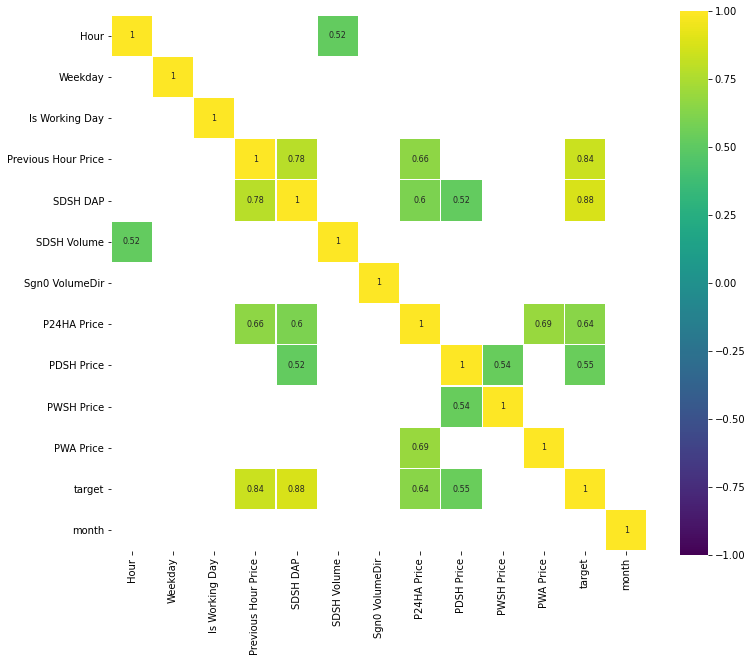

In [26]:
corr = train_df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

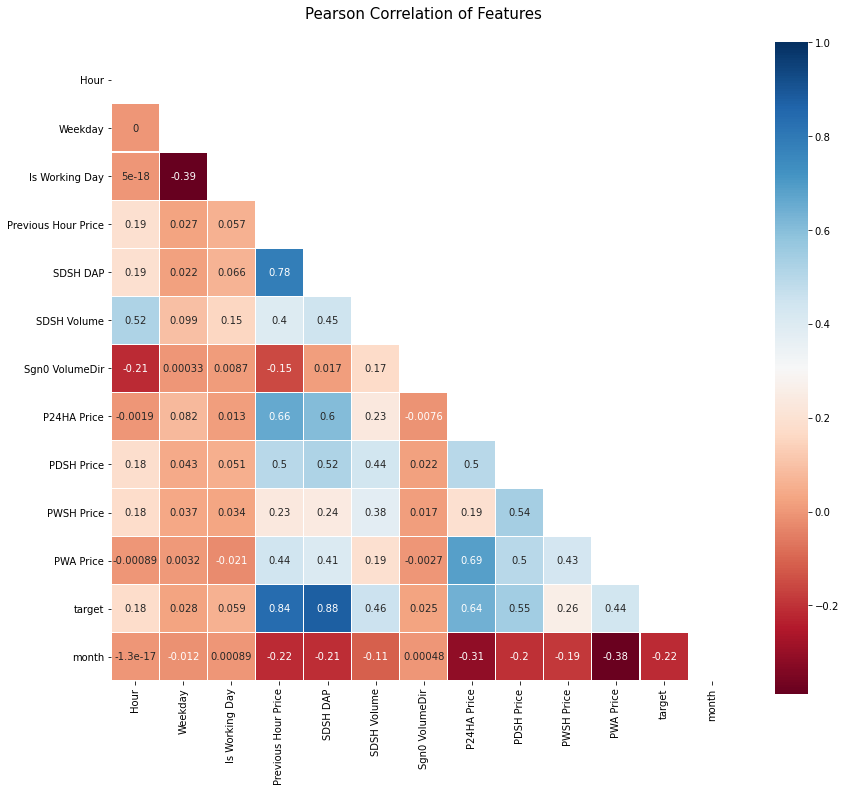

In [30]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

corr = train_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(corr, mask=mask , linewidths=0.1 , vmax=1.0, 
            square=True , cmap=colormap, linecolor='white' , annot=True)

In [31]:
corr.style.background_gradient(cmap=colormap, axis=None).set_precision(2)

,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
Hour,1.00,0.00,0.00,0.19,0.19,0.52,-0.21,-0.00,0.18,0.18,-0.00,0.18,-0.00
Weekday,0.00,1.00,-0.39,0.03,0.02,0.10,0.00,0.08,0.04,0.04,0.00,0.03,-0.01
Is Working Day,0.00,-0.39,1.00,0.06,0.07,0.15,0.01,0.01,0.05,0.03,-0.02,0.06,0.00
Previous Hour Price,0.19,0.03,0.06,1.00,0.78,0.40,-0.15,0.66,0.50,0.23,0.44,0.84,-0.22
SDSH DAP,0.19,0.02,0.07,0.78,1.00,0.45,0.02,0.60,0.52,0.24,0.41,0.88,-0.21
SDSH Volume,0.52,0.10,0.15,0.40,0.45,1.00,0.17,0.23,0.44,0.38,0.19,0.46,-0.11
Sgn0 VolumeDir,-0.21,0.00,0.01,-0.15,0.02,0.17,1.00,-0.01,0.02,0.02,-0.00,0.03,0.00
P24HA Price,-0.00,0.08,0.01,0.66,0.60,0.23,-0.01,1.00,0.50,0.19,0.69,0.64,-0.31
PDSH Price,0.18,0.04,0.05,0.50,0.52,0.44,0.02,0.50,1.00,0.54,0.50,0.55,-0.20
PWSH Price,0.18,0.04,0.03,0.23,0.24,0.38,0.02,0.19,0.54,1.00,0.43,0.26,-0.19


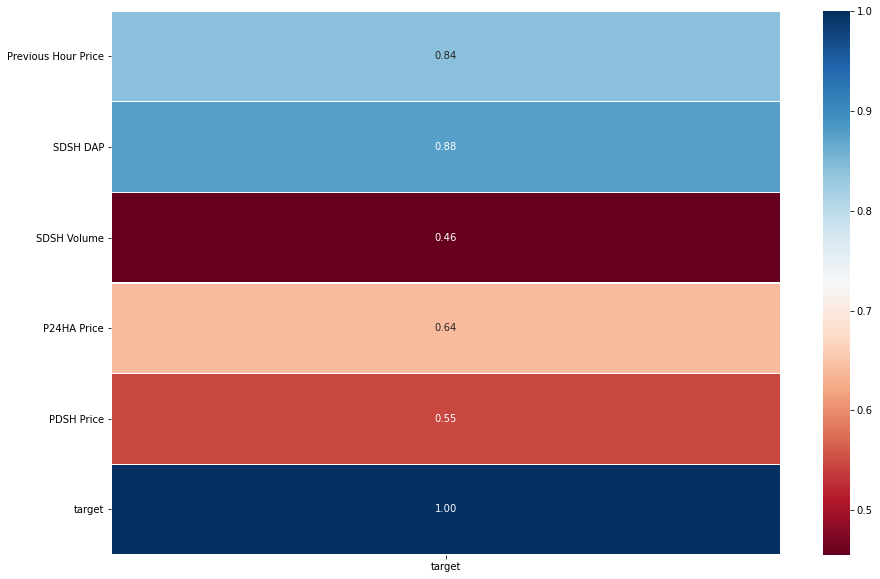

In [32]:
fig, ax = plt.subplots(figsize = (15, 10))

sns.heatmap(corr[['target']][round(corr['target'], 1) >= .5], annot=True, linewidths=.4, fmt=".2f", cmap=colormap, ax=ax);

In [33]:
train_df.corr()['target'].sort_values(ascending = False) 

target                 1.000000
SDSH DAP               0.877215
Previous Hour Price    0.842477
P24HA Price            0.640644
PDSH Price             0.545640
SDSH Volume            0.455266
PWA Price              0.435942
PWSH Price             0.261182
Hour                   0.177124
Is Working Day         0.058574
Weekday                0.028230
Sgn0 VolumeDir         0.025239
month                 -0.215488
Name: target, dtype: float64

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Family size and Parch (Parents and Children). I'll still leave both features in for the purposes of this exercise.

### Pairplots

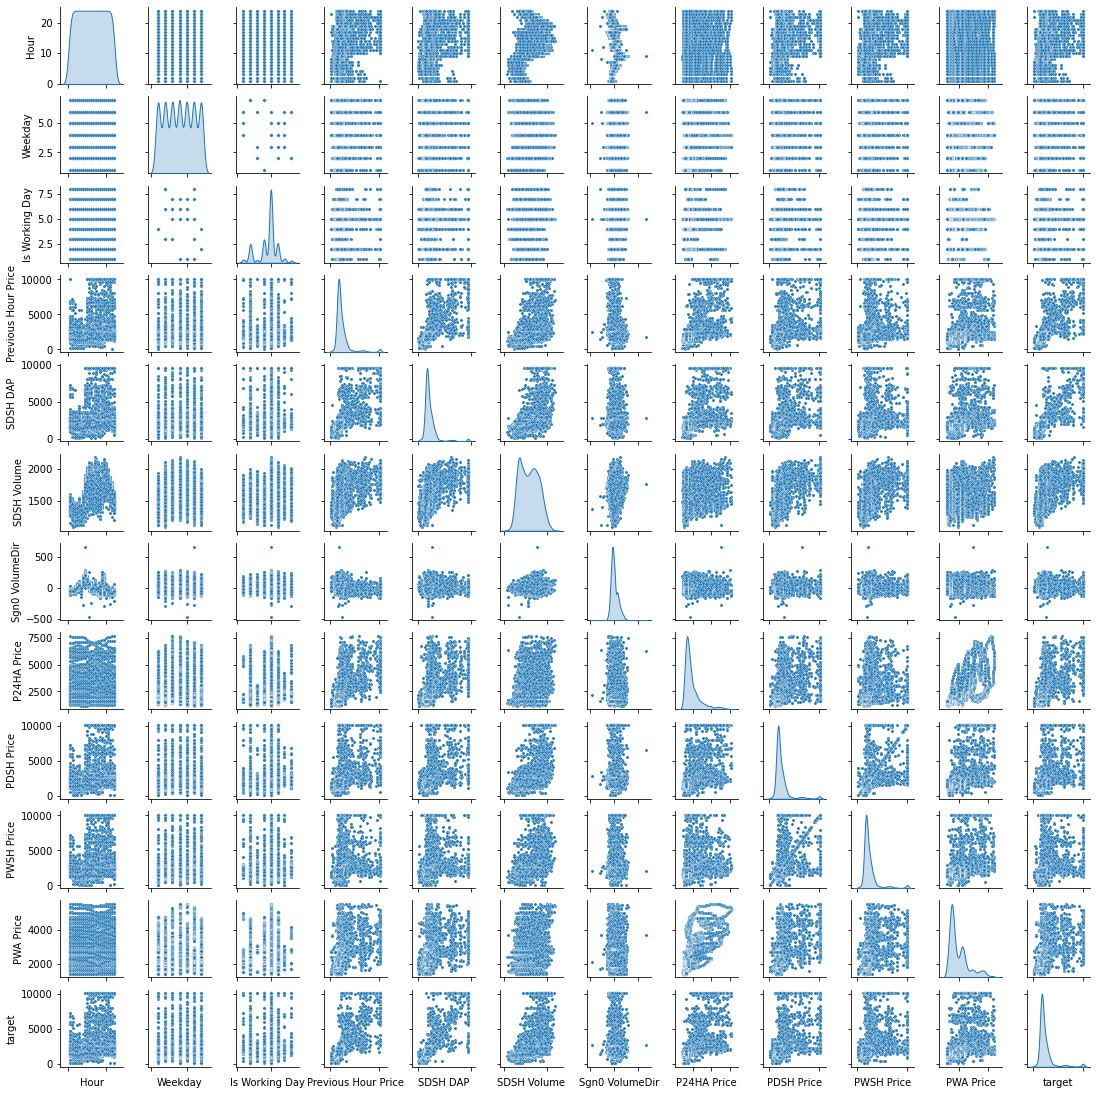

In [34]:
g = sns.pairplot(train_df[[u'Hour', u'Weekday', u'Is Working Day', u'Previous Hour Price', u'SDSH DAP', u'SDSH Volume', u'Sgn0 VolumeDir',
       u'P24HA Price', u'PDSH Price', u'PWSH Price',u'PWA Price',u'target' ]] , palette = 'seismic', size=1.3 , diag_kind = 'kde',
                 diag_kws=dict(shade=True) , plot_kws=dict(s=10) )
g.set(xticklabels=[])

<AxesSubplot:xlabel='target', ylabel='target'>

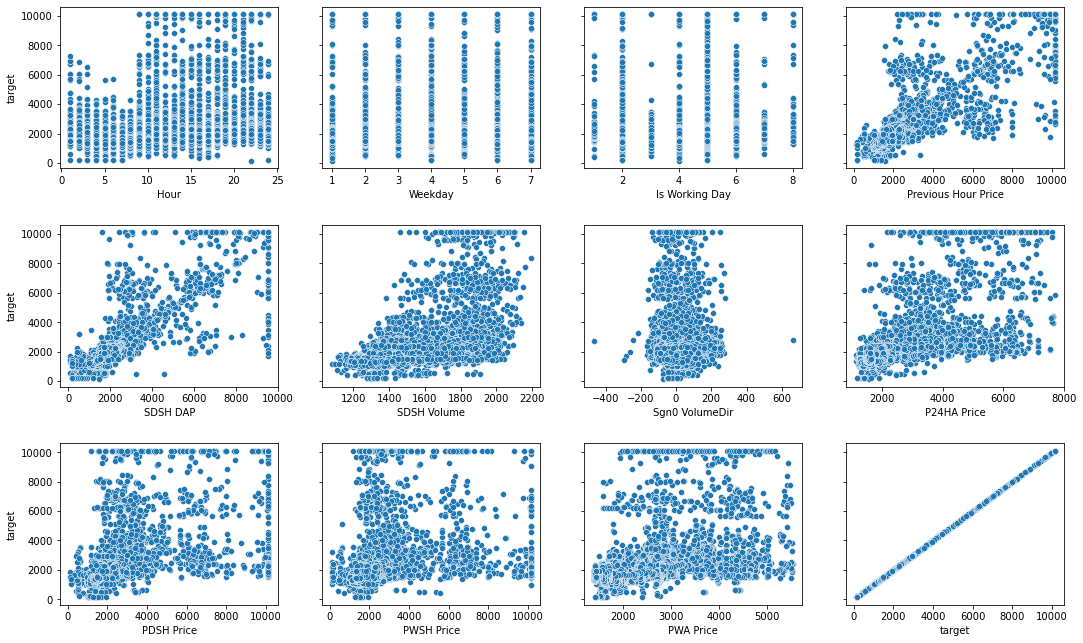

In [35]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
#sns.set(font_scale=.5)

sns.scatterplot(x=train_df.Hour, y=train_df.target, ax=ax[0, 0] )
sns.scatterplot(x=train_df.Weekday, y=train_df.target, ax=ax[0, 1])
sns.scatterplot(x=train_df['Is Working Day'], y=train_df.target, ax=ax[0, 2])
sns.scatterplot(x=train_df['Previous Hour Price'], y=train_df.target, ax=ax[0, 3])
sns.scatterplot(x=train_df['SDSH DAP'], y=train_df.target, ax=ax[1, 0])
sns.scatterplot(x=train_df['SDSH Volume'], y=train_df.target, ax=ax[1, 1])
sns.scatterplot(x=train_df['Sgn0 VolumeDir'], y=train_df.target, ax=ax[1, 2])
sns.scatterplot(x=train_df['P24HA Price'], y=train_df.target, ax=ax[1, 3])
sns.scatterplot(x=train_df['PDSH Price'], y=train_df.target, ax=ax[2, 0])
sns.scatterplot(x=train_df['PWSH Price'], y=train_df.target, ax=ax[2, 1])
sns.scatterplot(x=train_df['PWA Price'], y=train_df.target, ax=ax[2, 2])
sns.scatterplot(x=train_df['target'], y=train_df.target, ax=ax[2, 3])


## Target Variable Distribution

In [36]:
train_df.target.describe()

count     7584.000000
mean      2429.366103
std       1590.750740
min        124.160000
25%       1664.347500
50%       1945.700000
75%       2568.547500
max      10117.855409
Name: target, dtype: float64

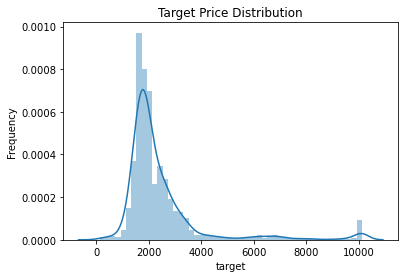

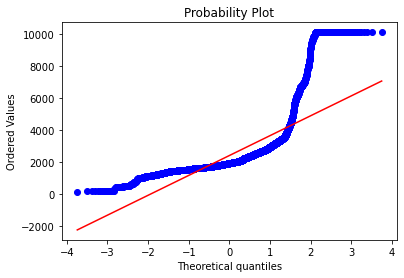

Skewness: 3.227


In [37]:
import scipy.stats as stats

sns.distplot(train_df['target'])
plt.title('Target Price Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(train_df['target'], plot=plt)
plt.show()

# For normally distributed data, the skewness should be about zero. 
print("Skewness: {:.3f}".format(train_df['target'].skew()))

Skewnewss quantifies how symmetrical the distribution is.
1. If skewness is less than -1 or greater than 1, the distribution is highly skewed.
2. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
3. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

As you can see the distribution plot and qq plot, the target variable is skewed to the right. In order to use many general linear models, we need to transform it to normal.

### Target Variable Transformation

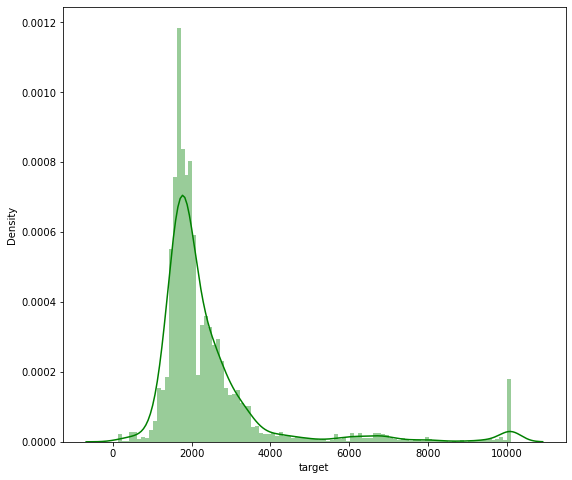

In [25]:
plt.figure(figsize=(9, 8))
sns.distplot(train_df['target'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [38]:
# log1p calculates log(1 + input)

train_df['target'] = np.log1p(train_df['target'])

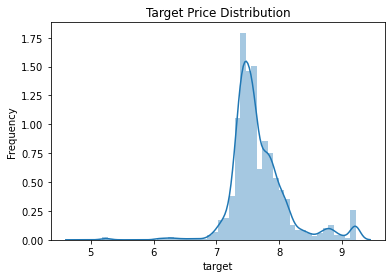

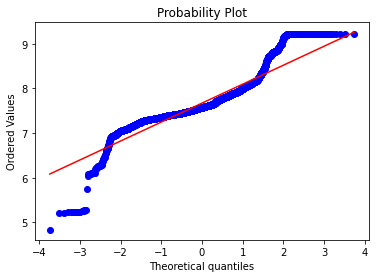

Skewness: 0.830


In [39]:
# let's check the result of the transformation

sns.distplot(train_df['target'])
plt.title('Target Price Distribution')
plt.ylabel('Frequency')

plt.figure()
qq = stats.probplot(train_df['target'], plot=plt)
plt.show()

print("Skewness: {:.3f}".format(train_df['target'].skew()))

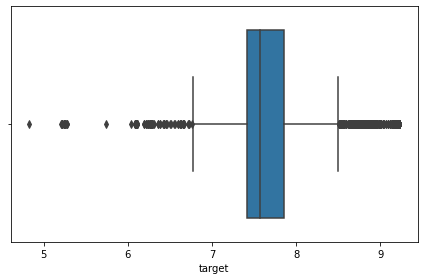

In [40]:
sns.boxplot(train_df['target'])
plt.tight_layout()

By just taking log, the shape of the distribution becomes almost normal.

As we can see the first column of the plots, it is not perfectly linear but we can say some of them are showing some positive linear pattern.

In [28]:
train_df.head(2)

,Date,Hour,Weekday,Is Working Day,Previous Hour Price,SDSH DAP,SDSH Volume,Sgn0 VolumeDir,P24HA Price,PDSH Price,PWSH Price,PWA Price,target,month
0,2020-01-08 00:00:00,1,4,7,2400.41,2479.45,1383.7,-100.7,3654.911667,2473.00,1837.47,2296.059524,2475.68,1
1,2020-01-08 01:00:00,2,4,7,2475.68,2494.00,1339.3,-44.4,3655.023333,2459.38,1434.83,2299.858393,2484.40,1


(array([   0,    1,    2, ..., 7282, 7283, 7284]),
 [Text(0, 0, '124.16'),
  Text(1, 0, '182.17'),
  Text(2, 0, '183.26'),
  Text(3, 0, '184.18'),
  Text(4, 0, '184.28'),
  Text(5, 0, '184.305'),
  Text(6, 0, '184.33'),
  Text(7, 0, '184.65'),
  Text(8, 0, '187.13'),
  Text(9, 0, '187.35'),
  Text(10, 0, '187.74'),
  Text(11, 0, '188.25'),
  Text(12, 0, '189.61'),
  Text(13, 0, '189.79'),
  Text(14, 0, '192.77'),
  Text(15, 0, '194.55'),
  Text(16, 0, '195.16'),
  Text(17, 0, '310.07'),
  Text(18, 0, '416.52'),
  Text(19, 0, '438.57'),
  Text(20, 0, '439.63'),
  Text(21, 0, '439.74'),
  Text(22, 0, '440.87'),
  Text(23, 0, '441.51'),
  Text(24, 0, '446.1'),
  Text(25, 0, '447.22'),
  Text(26, 0, '447.26'),
  Text(27, 0, '447.45'),
  Text(28, 0, '448.45'),
  Text(29, 0, '448.65'),
  Text(30, 0, '449.15'),
  Text(31, 0, '449.73'),
  Text(32, 0, '486.54'),
  Text(33, 0, '488.48'),
  Text(34, 0, '497.49'),
  Text(35, 0, '501.14'),
  Text(36, 0, '504.46'),
  Text(37, 0, '511.31'),
  Text(38

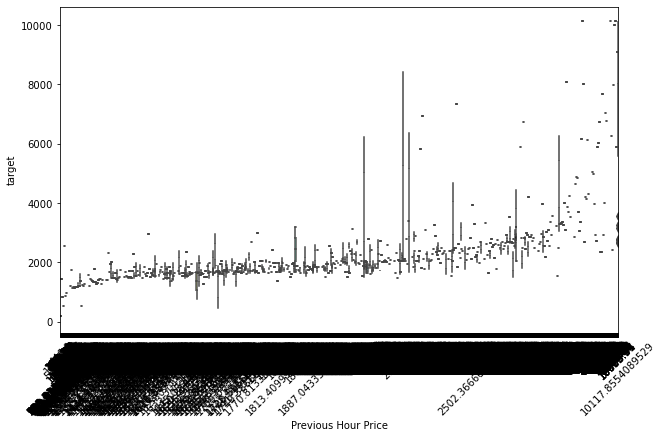

In [29]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Previous Hour Price', y='target', data=train_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='SDSH DAP', y='target', data=train_df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

## Estimate Skewness and Kurtosis

In [30]:
train_df.skew()

Hour                   0.000000
Weekday                0.000000
Is Working Day        -0.669150
Previous Hour Price    3.226994
SDSH DAP               3.257603
SDSH Volume            0.156842
Sgn0 VolumeDir         0.854164
P24HA Price            2.043149
PDSH Price             3.221066
PWSH Price             3.157980
PWA Price              1.352577
target                 3.226974
month                 -0.001817
dtype: float64

In [31]:
train_df.kurt()

Hour                   -1.204177
Weekday                -1.244474
Is Working Day          0.482193
Previous Hour Price    11.382383
SDSH DAP               12.194046
SDSH Volume            -0.952062
Sgn0 VolumeDir          1.505480
P24HA Price             4.259898
PDSH Price             11.496419
PWSH Price             10.863049
PWA Price               1.201173
target                 11.382072
month                  -1.169441
dtype: float64

<AxesSubplot:title={'center':'Log Normal'}, xlabel='target'>

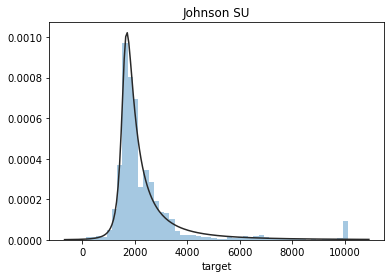

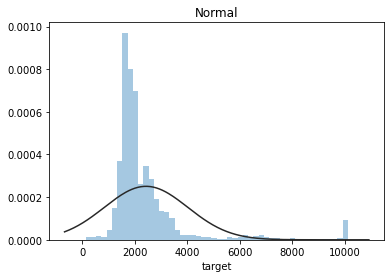

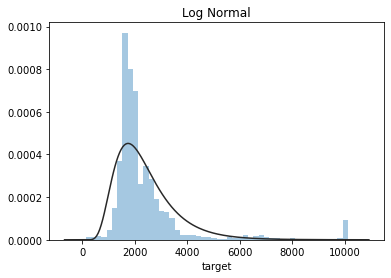

In [32]:
import scipy.stats as st

y = train_df['target']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

In [ ]:
sns.distplot(train_df.skew(),color='blue',axlabel ='Skewness')

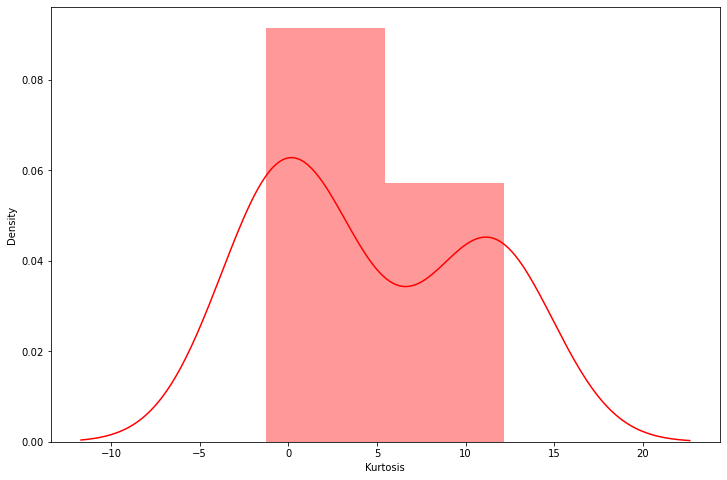

In [33]:
plt.figure(figsize = (12,8))
sns.distplot(train_df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

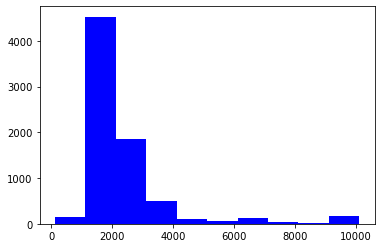

In [34]:
plt.hist(train_df['target'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([1.500e+01, 2.000e+00, 1.500e+01, 3.700e+01, 8.700e+01, 2.373e+03,
        3.468e+03, 1.039e+03, 2.250e+02, 3.230e+02]),
 array([4.82157106, 5.26161965, 5.70166825, 6.14171684, 6.58176544,
        7.02181403, 7.46186263, 7.90191122, 8.34195981, 8.78200841,
        9.222057  ]),
 <BarContainer object of 10 artists>)

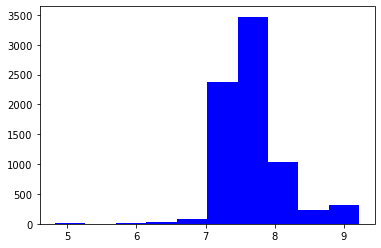

In [35]:
target = np.log(train_df['target'])
target.skew()
plt.hist(target,color='blue')

In [36]:
correlation = train_df.corr()
print(correlation['target'].sort_values(ascending = False),'\n')

target                 1.000000
SDSH DAP               0.877215
Previous Hour Price    0.842477
P24HA Price            0.640644
PDSH Price             0.545640
SDSH Volume            0.455266
PWA Price              0.435942
PWSH Price             0.261182
Hour                   0.177124
Is Working Day         0.058574
Weekday                0.028230
Sgn0 VolumeDir         0.025239
month                 -0.215488
Name: target, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

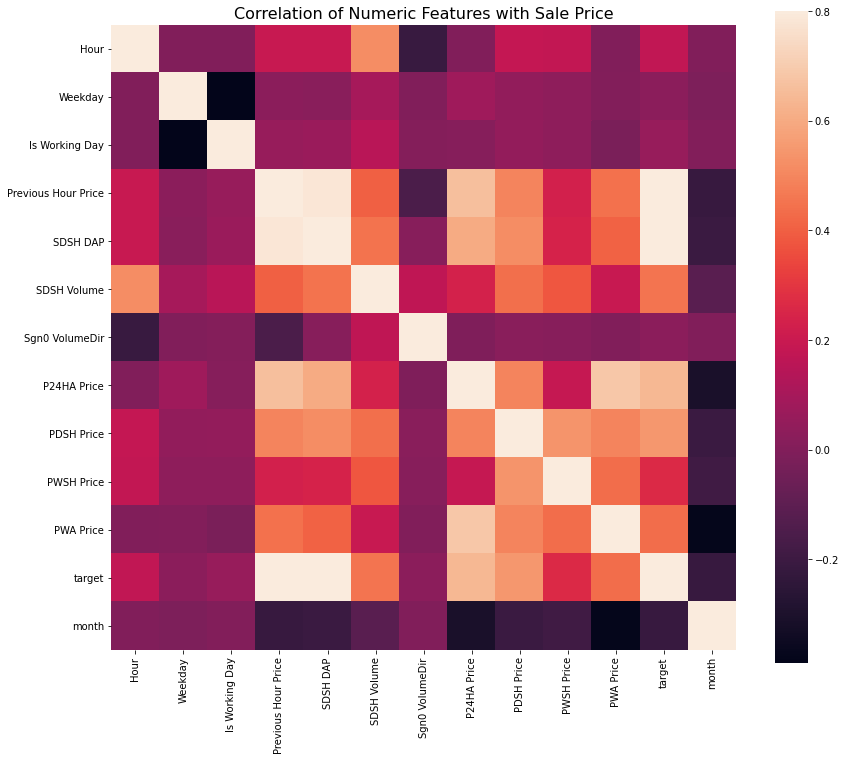

In [37]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

Index(['target', 'SDSH DAP', 'Previous Hour Price', 'P24HA Price',
       'PDSH Price', 'SDSH Volume', 'PWA Price', 'PWSH Price', 'Hour',
       'Is Working Day', 'Weekday'],
      dtype='object')


<AxesSubplot:>

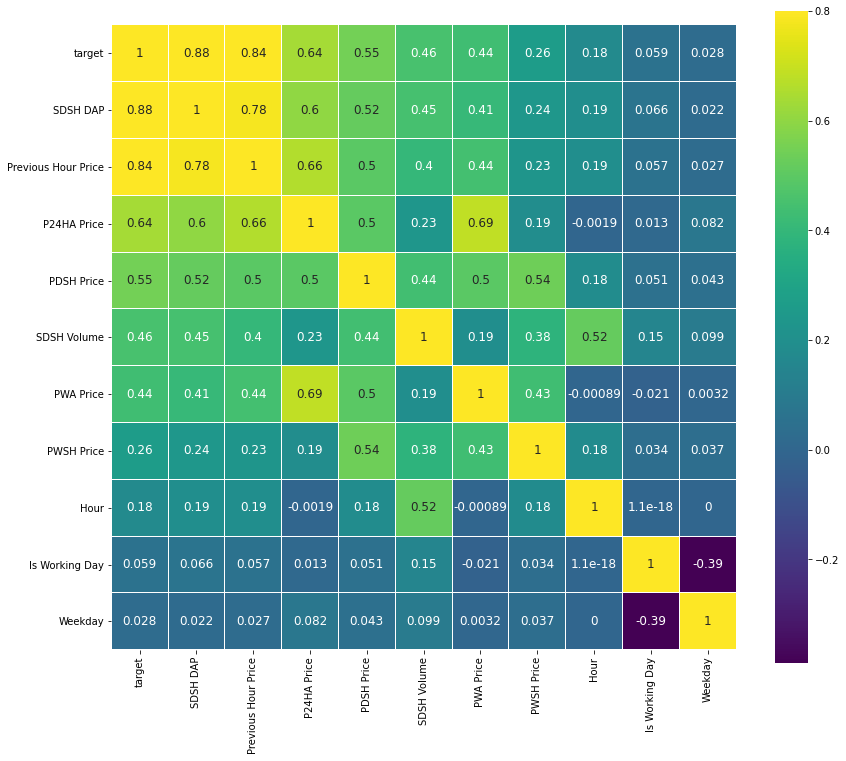

In [39]:
k= 11
cols = correlation.nlargest(k,'target')['target'].index
print(cols)
cm = np.corrcoef(train_df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [ ]:
Index(['target', 'SDSH DAP', 'Previous Hour Price', 'P24HA Price',
       'PDSH Price', 'SDSH Volume', 'PWA Price', 'PWSH Price', 'Hour',
       'Is Working Day', 'Weekday'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

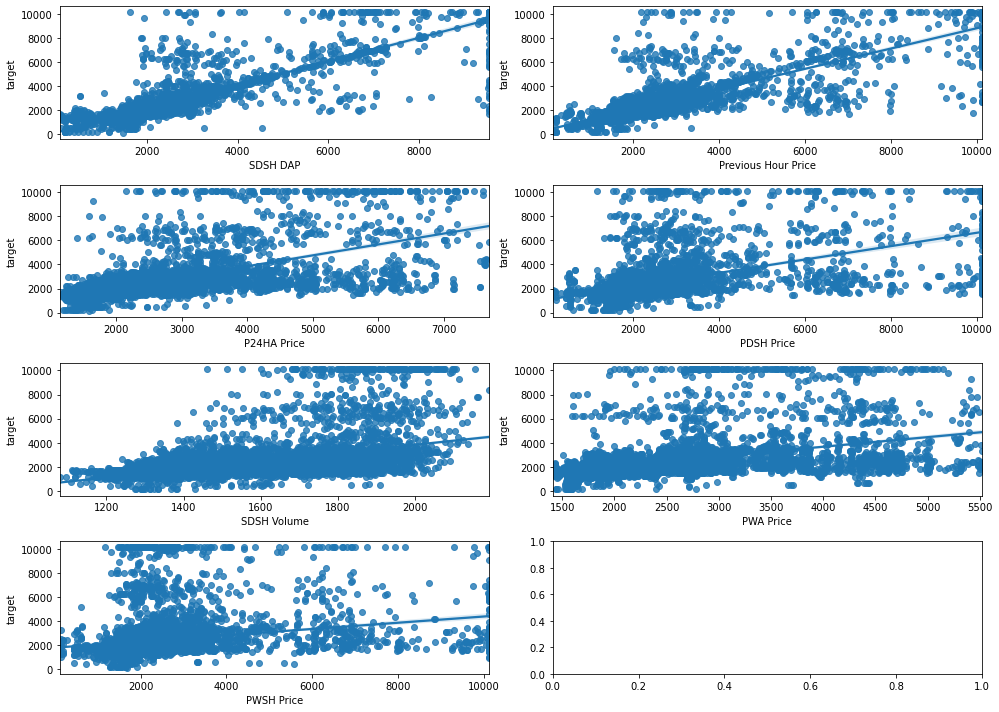

In [51]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(14,10))
SDSH_DAP_scatter_plot = pd.concat([train_df['target'],train_df['SDSH DAP']],axis = 1)
sns.regplot(x='SDSH DAP',y = 'target',data = SDSH_DAP_scatter_plot ,scatter= True, fit_reg=True, ax=ax1)

Previous_Hour_Price_scatter_plot = pd.concat([train_df['target'],train_df['Previous Hour Price']],axis = 1)
sns.regplot(x='Previous Hour Price',y = 'target',data = Previous_Hour_Price_scatter_plot ,scatter= True, fit_reg=True, ax=ax2)

P24HA_Price_scatter_plot = pd.concat([train_df['target'],train_df['P24HA Price']],axis = 1)
sns.regplot(x='P24HA Price',y = 'target',data = P24HA_Price_scatter_plot ,scatter= True, fit_reg=True, ax=ax3)

PDSH_Price_scatter_plot = pd.concat([train_df['target'],train_df['PDSH Price']],axis = 1)
sns.regplot(x='PDSH Price',y = 'target',data = PDSH_Price_scatter_plot ,scatter= True, fit_reg=True, ax=ax4)

SDSH_Volume_scatter_plot = pd.concat([train_df['target'],train_df['SDSH Volume']],axis = 1)
sns.regplot(x='SDSH Volume',y = 'target',data = SDSH_Volume_scatter_plot ,scatter= True, fit_reg=True, ax=ax5)

PWA_Price_scatter_plot = pd.concat([train_df['target'],train_df['PWA Price']],axis = 1)
sns.regplot(x='PWA Price',y = 'target',data = PWA_Price_scatter_plot ,scatter= True, fit_reg=True, ax=ax6)

PWSH_Price_scatter_plot = pd.concat([train_df['target'],train_df['PWSH Price']],axis = 1)
sns.regplot(x='PWSH Price',y = 'target',data = PWSH_Price_scatter_plot ,scatter= True, fit_reg=True, ax=ax7)
plt.tight_layout()